# Feed Forward Classification Model Comparison

Comparing standard feed forward neural network with Adam-optimized version for classification.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

2025-02-28 15:50:54.987943: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-28 15:50:54.991650: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-28 15:50:55.001245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740757855.016422   10417 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740757855.020962   10417 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 15:50:55.039590: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Load and prepare data
data = pd.read_csv('new_model.csv')

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
def create_model(optimizer):
    """Create a feed forward neural network with specified optimizer"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [4]:
# Train standard SGD model
sgd_model = create_model('sgd')
sgd_history = sgd_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


/workspaces/CKD_Diagnosis/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-28 15:50:58.999216: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4520 - loss: 0.7142 - val_accuracy: 0.6250 - val_loss: 0.6780
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5765 - loss: 0.6719 - val_accuracy: 0.6964 - val_loss: 0.6325
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7177 - loss: 0.6282 - val_accuracy: 0.8036 - val_loss: 0.5934
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7705 - loss: 0.5989 - val_accuracy: 0.8750 - val_loss: 0.5598
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8306 - loss: 0.5600 - val_accuracy: 0.8929 - val_loss: 0.5301
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8964 - loss: 0.5297 - val_accuracy: 0.9286 - val_loss: 0.5032
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9166 - loss: 0.4985 - val_accuracy: 0.9286 - val_loss: 0.4787
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9359 - loss: 0.4698 - val_accuracy: 0.9464 - val_loss: 0.4561
Epoch 9/100

In [5]:
# Train Adam model
adam_model = create_model('adam')
adam_history = adam_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2819 - loss: 0.8303 - val_accuracy: 0.4643 - val_loss: 0.7018
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6154 - loss: 0.6653 - val_accuracy: 0.8571 - val_loss: 0.5947
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9149 - loss: 0.5541 - val_accuracy: 0.9464 - val_loss: 0.5097
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9546 - loss: 0.4663 - val_accuracy: 0.9464 - val_loss: 0.4425
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9728 - loss: 0.3974 - val_accuracy: 0.9464 - val_loss: 0.3855
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9439 - loss: 0.3481 - val_accuracy: 0.9464 - val_loss: 0.3346
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9557 - loss: 0.3121 - val_accuracy: 0.9286 - val_loss: 0.2880
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9713 - loss: 0.2428 - val_accuracy: 0.9286 - val_loss: 0.2483
Epoch 9/100

In [6]:
def evaluate_model(model, model_name):
    """Evaluate model performance and print metrics"""
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    y_pred_prob = model.predict(X_test_scaled)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Evaluate both models
evaluate_model(sgd_model, "Standard SGD Model")
evaluate_model(adam_model, "Adam Model")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Standard SGD Model Performance Metrics:
Accuracy: 0.9833
Precision: 1.0000
Recall: 0.9737
F1 Score: 0.9867
ROC AUC: 1.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Adam Model Performance Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000


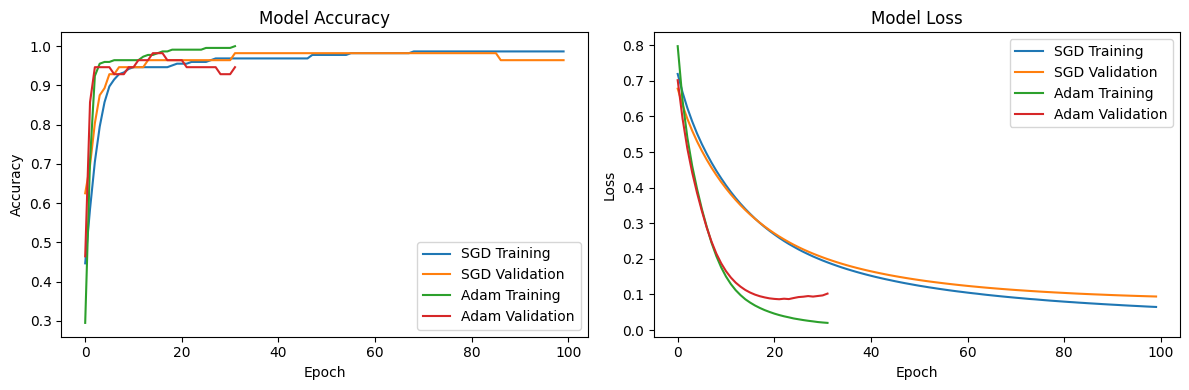

In [7]:
# Plot learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(sgd_history.history['accuracy'], label='SGD Training')
plt.plot(sgd_history.history['val_accuracy'], label='SGD Validation')
plt.plot(adam_history.history['accuracy'], label='Adam Training')
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(sgd_history.history['loss'], label='SGD Training')
plt.plot(sgd_history.history['val_loss'], label='SGD Validation')
plt.plot(adam_history.history['loss'], label='Adam Training')
plt.plot(adam_history.history['val_loss'], label='Adam Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()